In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt


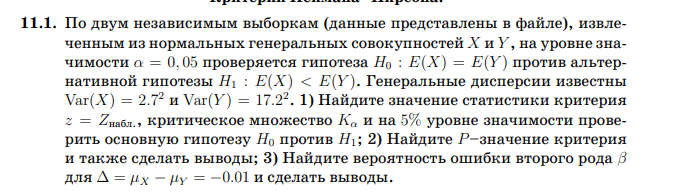

In [5]:
sample = pd.read_csv('sample_11_1_XY.csv', header = None, decimal = ',', sep = ';', encoding='cp1251');
sample.head()
sample[1] = sample.isna().sum()

In [6]:
sigma1 = 2.7
sigma2 = 17.2
alpha = 0.05

In [7]:
z_stat = (sample[0].mean() - sample[1].dropna().mean())/(sigma1**2/sample[0].size + sigma2**2/sample[1].dropna().size)**(1/2)
z_stat

-3.8207390463737387

In [8]:
C = st.norm.isf(0.05); C

1.6448536269514729

In [9]:
print(f'K = (-np.inf,-{C})')

K = (-np.inf,-1.6448536269514729)


In [10]:
z_stat

-3.8207390463737387

In [11]:
print(f'Наблюдаемое значение статистики не попадает в критическую \
область - гипотезу нельзя отвергнуть')

Наблюдаемое значение статистики не попадает в критическую область - гипотезу нельзя отвергнуть


In [12]:
pv = st.norm.cdf(z_stat); pv

6.6526186980608e-05

In [13]:
delta = -0.01

In [14]:
beta = st.norm.cdf(C + ((sample[0].size * sample[1].dropna().size)**(1/2) * delta)/(sample[1].dropna().size* sigma1**2 + sample[0].size * sigma2**2)**(1/2))

In [15]:
print(f'Beta = {beta}')

Beta = 0.9499151497186635


 #2
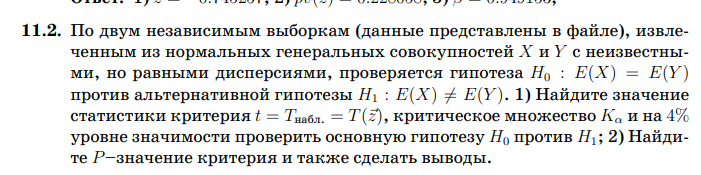

In [16]:
sample = pd.read_csv('sample_11_2_XY.csv',  header = None, decimal = ',', sep = ';', encoding='cp1251')
X_sample = sample[0].dropna()
Y_sample = sample[1].dropna()
n = X_sample.size
m = Y_sample.size
X_mean = X_sample.mean()
Y_mean = Y_sample.mean()
s_x = X_sample.var(ddof = 1)**(1/2)
s_y = Y_sample.var(ddof = 1)**(1/2)
alpha = 0.04

In [17]:
pooled_s = ((n - 1) * s_x**2/(n + m- 2) + (m - 1) * s_y**2/(n + m -2))**(1/2); pooled_s

9.298250318009526

In [18]:
T_stat = (X_mean - Y_mean)/pooled_s /(1/n + 1/m)**(1/2); T_stat

-2.2757593115433274

In [19]:
cvalue = st.t(n + m -2).isf(alpha/2); cvalue

2.263781279009663

In [20]:
print(f'K = (-{np.inf},-{cvalue})({cvalue},+{np.inf})\nT_stat = {T_stat}')

K = (-inf,-2.263781279009663)(2.263781279009663,+inf)
T_stat = -2.2757593115433274


Наблюдаемое значение входит в критическую область => гипотеза отклоняется

In [21]:
pv = 2*min(st.t(n + m - 2).cdf(T_stat),st.t(n + m - 2).sf(T_stat) ); pv

0.039104712196068044

$p < \alpha  \rightarrow гипотеза\ отклоняется$

#3
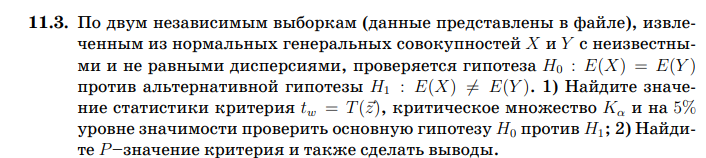

In [22]:
sample = pd.read_csv('sample_11_3_XY.csv', header = None, decimal = ',', sep = ';', encoding='cp1251')
X_sample = sample[0].dropna()
Y_sample = sample[1].dropna()
n = X_sample.size
m = Y_sample.size
X_mean = X_sample.mean()
Y_mean = Y_sample.mean()
s_x = X_sample.var(ddof = 1)**(1/2)
s_y = Y_sample.var(ddof = 1)**(1/2)
alpha = 0.05

In [23]:
S_Welch = (s_x**2/n + s_y**2/m)**(1/2)
T_stat_Welch = (X_mean - Y_mean)/S_Welch; T_stat_Welch

-5.166795565736608

In [24]:
f_hat = S_Welch**4/(s_x**4 /(n**2 * (n - 1)) + (s_y**4 /(m**2 * (m - 1))));f_hat

11.1780541254636

In [25]:
cvalue = st.t(f_hat).isf(alpha/2) *S_Welch; cvalue
print(f'K = (-{np.inf}, -{cvalue}),({cvalue}, +{np.inf})')
print(f'|X_mean - Y_mean| = {abs(X_mean - Y_mean)} попадает в критическую область => H0 отвергается')

K = (-inf, -7.685473820252178),(7.685473820252178, +inf)
|X_mean - Y_mean| = 18.076658711951517 попадает в критическую область => H0 отвергается


In [26]:
pv = 2*min(st.t(f_hat).sf(T_stat_Welch), st.t(f_hat).cdf(T_stat_Welch)); pv

0.00029444309499353504

#4
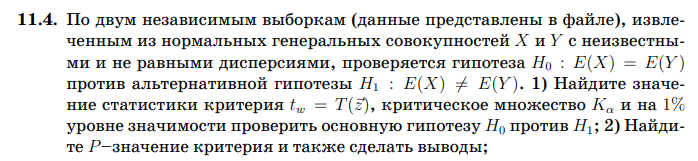

In [27]:
sample = pd.read_csv('sample_11_4_XY.csv', header = None, decimal = ',', sep = ';', encoding='cp1251')
X_sample = sample[0].dropna()
Y_sample = sample[1].dropna()
n = X_sample.size
m = Y_sample.size
X_mean = X_sample.mean()
Y_mean = Y_sample.mean()
s_x = X_sample.var(ddof = 1)**(1/2)
s_y = Y_sample.var(ddof = 1)**(1/2)
alpha = 0.01

In [28]:
S_Welch = (s_x**2/n + s_y**2/m)**(1/2)
T_stat_Welch = (X_mean - Y_mean)/S_Welch; T_stat_Welch

0.6346186667119256

In [29]:
f_hat = S_Welch**4/(s_x**4 /(n**2 * (n - 1)) + (s_y**4 /(m**2 * (m - 1))));f_hat

22.58120255174044

In [30]:
cvalue = st.t(f_hat).isf(alpha/2) *S_Welch; cvalue
print(f'K = (-{np.inf}, -{cvalue}),({cvalue}, +{np.inf})')
print(f'|X_mean - Y_mean| = {abs(X_mean - Y_mean)} не попадает в критическую область => H0 не отвергается')

K = (-inf, -6.910627494715022),(6.910627494715022, +inf)
|X_mean - Y_mean| = 1.5596144990196095 не попадает в критическую область => H0 не отвергается


In [31]:
pv = 2*st.t(f_hat).sf(T_stat_Welch); pv

0.532054842325337

#7
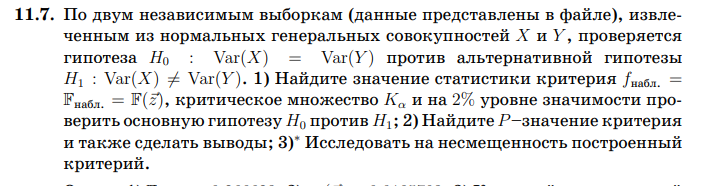

In [52]:
sample = pd.read_csv('sample_11_7_XY.csv', header = None, decimal = ',', sep = ';', encoding='cp1251')
alpha = 0.02
X_sample = sample[0].dropna()
Y_sample = sample[1].dropna()
n = X_sample.size
m = Y_sample.size
X_mean = X_sample.mean()
Y_mean = Y_sample.mean()
s_x = X_sample.var(ddof = 1)**(1/2)
s_y = Y_sample.var(ddof = 1)**(1/2)

In [53]:
F_stat = (s_x/s_y)**2; F_stat

0.266623095503372

In [54]:
cvalue1 = st.f(n-1, m-1).ppf(alpha/2)
cvalue2 = st.f(n-1, m-1).isf(alpha/2); 
print(f'K = (0, {cvalue1}, ({cvalue2}, +{np.inf}))\nF_stat = {F_stat}')
print('Наблюдаемое значение статистики входит в критическую область => гипотеза отвергается')

K = (0, 0.270934321659727, (4.520448216180088, +inf))
F_stat = 0.266623095503372
Наблюдаемое значение статистики входит в критическую область => гипотеза отвергается


In [55]:
pv = 2*min(st.f(n-1, m-1).sf(F_stat), st.f(n-1, m-1).cdf(F_stat)); pv

0.018579250846445097

Проверка критерия на несмещенность:
$\beta(\lambda) = F_\eta(\lambda * f_\alpha/2(n-1, m-1)) - F_\eta(\lambda * f_(1-\alpha/2)(n-1, m-1)) $

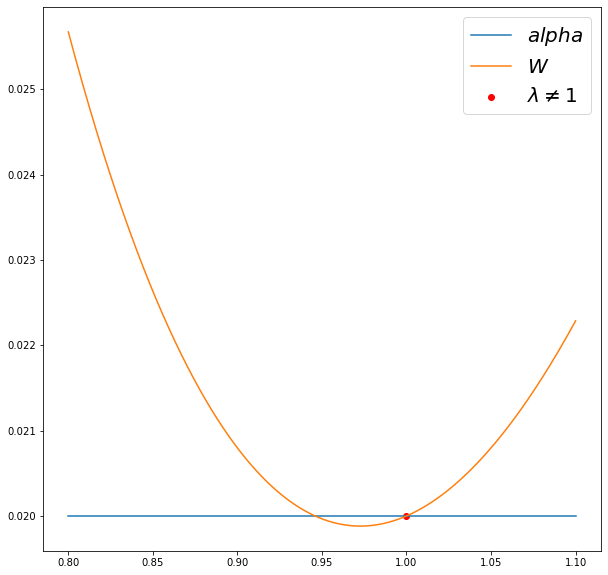

In [131]:
eta = st.f(n-1, m-1)
Lambda = np.linspace(0.8, 1.1, 1000)
fig, ax = plt.subplots(figsize = (10, 10))
ax.plot(Lambda, np.array([alpha] * 1000), label = '$alpha$')
ax.plot(Lambda, 1 - eta.cdf(Lambda * (eta.isf(alpha/2))) + eta.cdf(Lambda * (eta.isf(1 - alpha/2))),\
       label = '$W$')
ax.scatter(1, 0.02, c ='red', label ='$\lambda \\neq 1$')
ax.legend(prop={'size': 20})

Критерий смещен.

In [143]:
f = lambda x: 1 - eta.cdf(x * (eta.isf(alpha/2))) + eta.cdf(x * (eta.isf(1 - alpha/2))) - alpha

In [149]:
scipy.optimize.root(f, [0.8,0.99])

    fjac: array([[-0.96105671, -0.27635124],
       [ 0.27635124, -0.96105671]])
     fun: array([6.50934168e-13, 9.12061052e-12])
 message: 'The solution converged.'
    nfev: 14
     qtf: array([-9.48643823e-11, -2.69253693e-10])
       r: array([ 0.00954796, -0.00242254, -0.00838939])
  status: 1
 success: True
       x: array([0.94593488, 1.        ])

Точки пересечения: array([0.94593488, 1])